In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from multithreshold import otsu
import numpy as np
import queue

T1 = 0.03
T2 = 0.04
T3 = 0.085
D_min = 5
D_max = 25
P = 50
k = 8
L = 256
M = 2
N = L // M



def preprocess(path,T_ctr=0.02):
    img = cv2.imread(path,0) # To gray scale
    l_ctr = local_contrast(img) #caluculate  local contrast
    if l_ctr < T_ctr:
        clahe = cv2.createCLAHE() # This has hyper parameters!!
        img = clahe.apply(img)
    cv2.imwrite("processed_"+path,img)


def local_contrast(img,window=(3,3)):
    contrasts = []
    for i in range(img.shape[0]-window[0]+1):
        for j in range(img.shape[1]-window[1]+1):
            #print(i,j)
            #contrasts.append(get_contrast(img[i:i+window[0],j:j+window[1]]))
            I_max = int(np.max(img[i:i+window[0],j:j+window[1]]))
            I_min = int(np.min(img[i:i+window[0],j:j+window[1]]))
            ctr = (I_max-I_min)/(I_max+I_min+1e-10)
            if ctr > 1:
                print(ctr,I_max,I_min,i,j)
            contrasts.append(ctr)
    return sum(contrasts)/len(contrasts)

def is_noise(S,k=8):
    m = np.mean(S)
    std = np.std(S)
    black_count = len(np.argwhere(S==0))
    return black_count > m + k*std

def first_binarize(path):
    img = cv2.imread(path,0)
    ctr = local_contrast(img)
    print(ctr)
    if ctr <= T1:
        img = TSMO(img,th_num=2)
    elif ctr <= T2:
        T_o,img_otsu = cv2.threshold(s_img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
        img_TSMO,thresholds = TSMO(img,th_num=2)
        T_o2 = thresholds[1]
        nb1 = len(np.argwhere((T_o<img)&(T_o2>=img)))
        nb2 = len(np.argwhere(T_o>= img))
        if ((D_min <= abs(T_o2-T_o)<=D_max) and (nb1 <= P*nb2)):
            img = img_TSMO
        else:
            img = img_otsu
    elif ctr <= T3:
        ret2,img = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    else:
        img,_ = TSMO(img,th_num=1)
    outname = path.replace("processed","g-binarized")
    cv2.imwrite(outname,img)
    
def second_binarize(path,window=(35,35)):
    img = cv2.imread(path,0)
    out_img = img.copy()
    for i in range(img.shape[0] - window[0] + 1):
        for j in range(img.shape[1] - window[1] + 1):
            S = img[i:i+window[0],j:j+window[1]]
            if is_noise(S):
                out_img[i:i+window[0],j:j+window[1]] = cv2.ximgproc.niBlackThreshold(S,
                                                                                    maxValue=255,
                                                                                    type=cv2.THRESH_BINARY,
                                                                                    blockSize=35,
                                                                                    k=-0.2,
                                                                                    binarizationMethod=cv2.ximgproc.BINARIZATION_NICK)
    outname = path.replace("g-binarized","completed")
    cv2.imwrite(outname,out_img)
                
def TSMO(img,th_num = 1,L=256,M=64):
    hist = cv2.calcHist(
        [img],
        channels=[0],
        mask=None,
        histSize=[L],
        ranges=[0, L]
    )
    thresholds2 = otsu.modified_TSMO(hist, M=M, L=L)
    new_img = np.zeros_like(img)
    #thresholds2 = sorted(thresholds2)
    print(thresholds2)
    new_img[img>thresholds2[th_num-1]] = 255
    return new_img,thresholds2




def noise_remove(path):
    print("Preprocessing!!")
    preprocess(path)
    print("First Stage!!")
    first_binarize("processed_"+path)
    print("Second Stage!!")
    second_binarize("g-binarized_"+path)
    

In [ ]:
noise_remove("test.png")

In [ ]:
!ls

In [ ]:
cv2.imwrite("binarized_dirty.jpg",img)

In [ ]:
ctr

In [19]:
s_img = cv2.imread("processed_HW4.png",0)

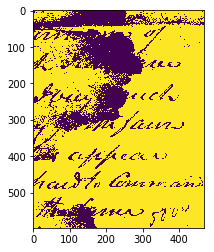

In [20]:
#n_img = TSMO(s_img,th_num=1,M=32)
_,n_img = cv2.threshold(s_img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.imshow(n_img)

In [ ]:
n_img[0,0] + n_img[0,0]

In [ ]:
n_img = TSMO(s_img,th_num=1,M=16)
#th,n_img = cv2.threshold(s_img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.imshow(n_img)

In [ ]:
first_binarize("test.png")

In [ ]:
new_img

In [ ]:
arr = np.array([[12,1,15],[5,2,7],[2,8,1]])

In [ ]:
arr[arr>5] = 255

In [ ]:
res = cv2.ximgproc.niBlackThreshold(s_img,maxValue=255,type=cv2.THRESH_BINARY,blockSize=35,k=-0.2,binarizationMethod=cv2.ximgproc.BINARIZATION_NICK)
plt.imshow(res)

In [ ]:
bin(cv2.THRESH_OTSU+cv2.THRESH_BINARY_INV)

In [ ]:
np.max(res)

In [ ]:
first_binarize()

In [ ]:
is_noise(res)

In [ ]:
plt.imshow(res)

In [ ]:
arr = np.array([
    [4,5,6],
    [5,9,19],
    [7,3,10]
])

In [ ]:
arr[(arr>4)&(arr<11)]

In [ ]:
padding_img = np.zeros((11,11))

In [ ]:
padding_img[1:-1,1:-1] = test_img

In [74]:
#Post process
def remove_isolated(img):
    """
    img is binarized!!
    Post process1
    """
    padding_img = np.zeros((img.shape[0]+2,img.shape[1]+2))
    padding_img[1:-1,1:-1] = img 
    check_filter = np.zeros((3,3)).astype("bool") # all False!
    check_filter[1,1] = True
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            tmp = padding_img[i:i+3,j:j+3]
            if np.sum((tmp == 0) == check_filter) == 9:#all same
                padding_img[i+1,j+1] = 255
    return padding_img[1:-1,1:-1]
                
def fill_one_pixel_gap(img):
    """
    post process 2
    """
    padding_img = np.zeros((img.shape[0]+2,img.shape[1]+2))
    padding_img[1:-1,1:-1] = img
    check_filter = np.ones((3,3)).astype("bool") # all True!
    check_filter[1,1] = False
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            tmp = padding_img[i:i+3,j:j+3]
            if np.sum((tmp == 0) == check_filter) == 9:
                padding_img[i+1,j+1] = 0
    return padding_img[1:-1,1:-1]

def post_process(img):
    img = remove_isolated(img)
    img = fill_one_pixel_gap(img)
    return img


def get_connected_component(img):
    import sys
    sys.setrecursionlimit(10**6)
    component_img = img.copy()
    connected_component = {}
    component_cnt = 0
    
    def search_connected(i,j):
        print(i,j)
        if i<0 or j<0 or i>=img.shape[0] or j>=img.shape[1]:
            return
        if component_img[i,j] != 0:
            return
        print(i,j,component_img[i,j])
        component_img[i,j] = - component_cnt
        connected_component[component_cnt].append((i,j))
        for si in [-1,0,1]:
            for sj in [-1,0,1]:
                search_connected(i+si,j+sj)
    
    
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if component_img[i,j] == 0:
                component_cnt += 1
                connected_component[component_cnt] = []
                search_connected(i,j)
    return connected_component


def get_connected_component2(img):
    component_img = img.copy()
    queue = []
    component_cnt = 0
    connected_component = {}
    
    def check_range(i,j):
        return i>=0 and j>=0 and i<img.shape[0] and j<img.shape[1]
    
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if component_img[i,j] == 0:
                component_cnt += 1
                connected_component[component_cnt] = []
                queue.append((i,j))
                while len(queue) >0:
                    si,sj = queue[0]
                    connected_component[component_cnt].append((si,sj))
                    component_img[si,sj] = - component_cnt
                    del queue[0]
                    for di in [-1,0,1]:
                        for dj in [-1,0,1]:
                            if check_range(si + di,sj + dj) and \
                             not (si + di,sj + dj) in queue and \
                             not (si + di,sj + dj) in connected_component[component_cnt] and\
                             component_img[si + di,sj + dj] == 0:
                                queue.append((si + di,sj + dj))
    return connected_component,component_img
                    
    
    

In [24]:
p_img = post_process(n_img)

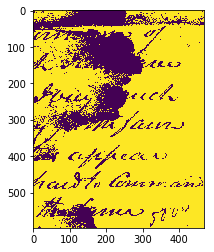

In [27]:
plt.imshow(p_img)

In [ ]:
plt.imshow(res)

In [75]:
res,cc = get_connected_component2(p_img)

In [45]:
res[3]

[(0, 90)]

In [6]:
q = queue.Queue()

In [ ]:
q.put(1)

In [11]:
q.get()

KeyboardInterrupt: 

In [12]:
q.put(1)

In [16]:
q.get()

1

In [17]:
q.empty()

True

In [46]:
p_img[res[1]]

/Users/hirokimoriguchi/.pyenv/versions/miniconda3-latest/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  """Entry point for launching an IPython kernel.


array([255., 255.])

In [47]:
res[1]

[(0, 25), (0, 26)]

In [52]:
p_img[0:2,24:28]

array([[255.,   0.,   0., 255.],
       [255., 255., 255., 255.]])

In [54]:
p_img[(0,)].shape

(2, 469)

In [68]:
arg_0 = np.argwhere(n_img==0)

In [ ]:
arg

In [64]:
np.sum(n_img==0)

68771

In [65]:
n_img.shape[0] * n_img.shape[1]

279993

In [66]:
n_img==0

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [70]:
n_img[arg_0].shape

(68771, 2, 469)

In [72]:
n_img.shape

(597, 469)

In [73]:
n_img

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [2]:
import numpy as np

In [5]:
arr = np.array([[1,4,2],[1,0,1]])

In [7]:
np.argwhere(arr==1)

array([[0, 0],
       [1, 0],
       [1, 2]])

In [11]:
arr[1,1]

0

In [16]:
arr = np.arange(20).reshape(5,4)

In [17]:
arr[2:5,1:3]

array([[ 9, 10],
       [13, 14],
       [17, 18]])

In [18]:
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19]])